### Exercise 1e)

In this section, we present the non-stochastic GD results of Lasso regression. 

In [53]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from methods.training_methods import GradientDescent, StochasticGradientDescent
from methods.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures
from utils import generate_dataset

In [54]:
# Generating dataset
np.random.seed(124)  
x, y = generate_dataset()

In [ ]:
# Define parameters and initial conditions for gradient descent. 
# NOTE: we defined the seed for numpy random in the code block above. Thus, if you run this 
# block several times, then "theta" may not be the same every time. Therefore, it is important 
# that you run the whole notebook in order to generate the same results as in the report.

p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

In [56]:
# Plot 1 - R2 as a function of the number of iterations with Lasso regression, for ordinary, momentum, Adagrad, RMSProp and Adam GD

iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.001))
gd_momentum = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.001, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.016, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.02, beta1=0.9, beta2=0.999))

One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
One_minus_R2_data_gd_momentum = gd_momentum.train(iterations=iterations)
One_minus_R2_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
One_minus_R2_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
One_minus_R2_data_gd_Adam = gd_Adam.train(iterations=iterations)

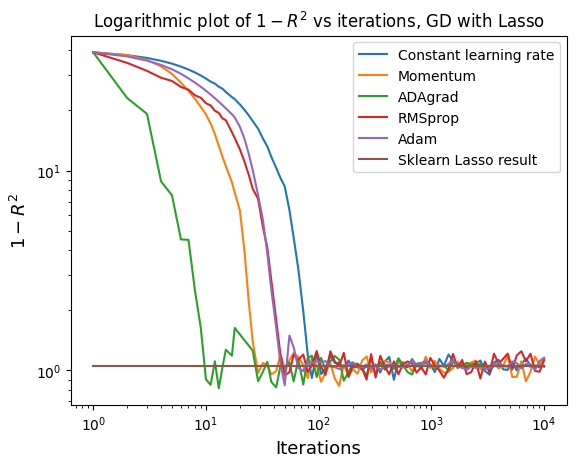

In [57]:
plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label='Constant learning rate')
plt.plot(One_minus_R2_data_gd_momentum[0], One_minus_R2_data_gd_momentum[1], label='Momentum')
plt.plot(One_minus_R2_data_gd_ADAgrad[0], One_minus_R2_data_gd_ADAgrad[1], label='ADAgrad')
plt.plot(One_minus_R2_data_gd_RMSprop[0], One_minus_R2_data_gd_RMSprop[1], label='RMSprop')
plt.plot(One_minus_R2_data_gd_Adam[0], One_minus_R2_data_gd_Adam[1], label='Adam')

sklearn_1_R2 = gd_constant.sklearn_lasso_1_R2(10**1)
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*sklearn_1_R2,label="Sklearn Lasso result")

plt.title("Logarithmic plot of $1 - R^2$ vs iterations, GD with Lasso")
plt.xlabel("Iterations",fontsize = 13)
plt.ylabel("$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend()

plt.show()

In [58]:
print("Value of 1 - R2 at the minimum of the cost function, Lasso regression: ", sklearn_1_R2)

Value of 1 - R2 at the minimum of the cost function, Lasso regression:  1.0565848811735064


In the code block below, we tested different collections of learning rates and plotted $1 - R^2$ as a function of the number of iterations for the learning rates that were chosen. Thus, this is the "playing ground" for the manual grid search for Lasso regression that we explained in the report. 

In the plot below, we have given a basic example using ordinary GD. We see that for each learning rate chosen, there are significant oscillations around the minimum, but the amplitude of the oscillations are not significantly different for different learning rates. Thus, we choose the highest learning rate (which reaches the minimum after the fewest number of iterations) as the best value. 

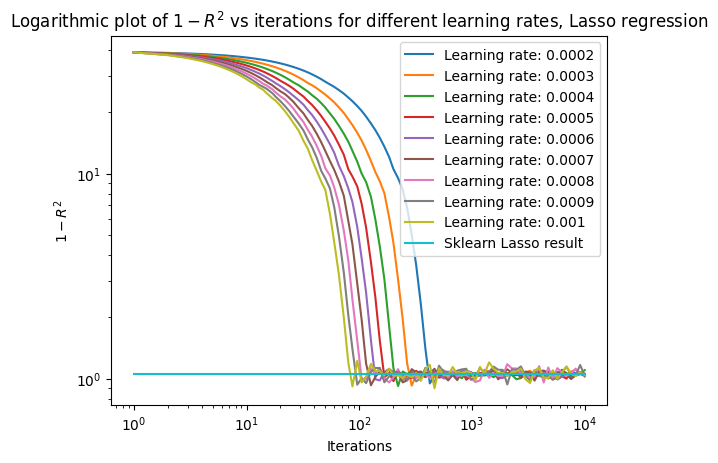

In [59]:
# Plot 1 - R2 as a function of the number of iterations for several values of the learning rate, Lasso regression

iterations = 10**4

learning_rates = np.linspace(0.0002,0.001,9)

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=learning_rates[i]))
    One_minus_R2_data_gd_constant_step = gd_constant.train(iterations=iterations)
    plt.plot(One_minus_R2_data_gd_constant_step[0], One_minus_R2_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],4)}")

sklearn_1_R2 = gd_constant.sklearn_lasso_1_R2(10**1)
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*sklearn_1_R2,label="Sklearn Lasso result")
plt.xlabel("Iterations")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.legend(loc="upper right")

plt.title("Logarithmic plot of $1 - R^2$ vs iterations for different learning rates, Lasso regression")
plt.show()

NOTES: 

Here, we present some notes and details on the observations that were made during the manual search. We first made a broad search for learning rates, to get a sense of the landscape. The "interval of learning rate" then refers to the finer range of learning rates in which we looked for optimal values, as described in the report. 

-Generically, there are large fluctuations in the MSE around the minimum. This is true for all gradient descent methods (though they attenuate in the case of Adagrad).

-Ordinary gradient descent: interval in learning rate between 0.0002 and 0.001. For learning rates larger than 0.001, there are large fluctuations around the minimum. 

-For momentum gradient descent: interval learning rate between 0.0002 and 0.001. For learning rates larger than 0.001, there are large fluctuations around the minimum. 

-For Adagrad: interval in learning rate between 0.05 and 0.3. For Adagrad, there were large oscillations in $1 - R^2$ for early iterations. However, the iterations damped over time. Thus small oscillations at the end (unlike the other gradient descent methods). 

-For RMSprop: interval in learning rates between 0.01 and 0.06. For learning rates larger than roughly 0.06, the $1-R^2$ value does not converge towards the one with the optimal parameters. Generally, there are large fluctuations for larger values of the learning rate. 

-For Adam, $1 - R^2$ does not converge towards the minimum for learning rates larger than 0.1 (it oscillations around a larger value of $1 - R^2$). For larger learning rates, there are larger oscillations. For a learning rate between 0.02 and 0.1, the gradient descent converged after roughly the same number of iterations (roughly 60 iterations). 

### Exercise 1f)

Here, we include stochastic gradient descent in our analysis. We implement both Ridge, Lasso and OLS regression in this case. 

In [60]:
# OLS regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.2))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.3, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.3))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.008, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=AdamStep(learning_rate=0.1, beta1=0.9, beta2=0.999))


One_minus_R2_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
One_minus_R2_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations,n_batches = n_batches)
One_minus_R2_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)



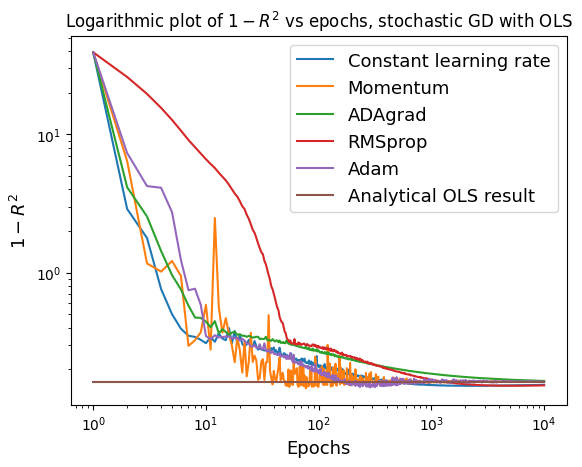

In [61]:
plt.plot(One_minus_R2_data_gd_constant_step_stochastic[0], One_minus_R2_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(One_minus_R2_data_gd_momentum_stochastic[0], One_minus_R2_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(One_minus_R2_data_gd_ADAgrad_stochastic[0], One_minus_R2_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(One_minus_R2_data_gd_RMSprop_stochastic[0], One_minus_R2_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(One_minus_R2_data_gd_Adam_stochastic[0], One_minus_R2_data_gd_Adam_stochastic[1],label='Adam')

analytical_1_R2 = gd_constant_stochastic.analytical_OLS_1_R2()
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical OLS result")

plt.title("Logarithmic plot of $1 - R^2$ vs epochs, stochastic GD with OLS")
plt.xlabel("Epochs",fontsize = 13)
plt.ylabel("$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend(loc="upper right",fontsize = 13)

plt.show()

In [62]:
# Ridge regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.04))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.003, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.4))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.005, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.05, beta1=0.9, beta2=0.999))

One_minus_R2_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
One_minus_R2_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)

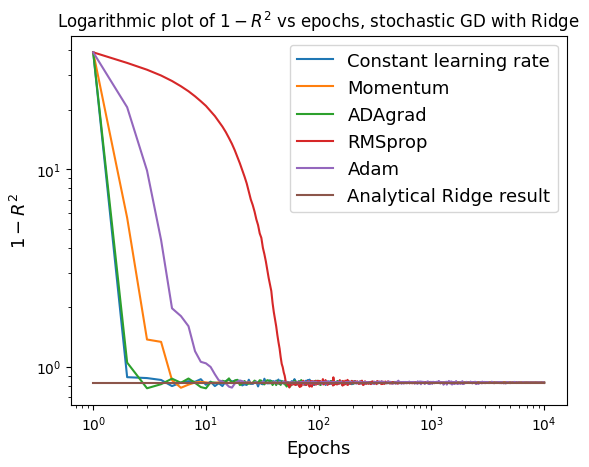

In [63]:
plt.plot(One_minus_R2_data_gd_constant_step_stochastic[0], One_minus_R2_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(One_minus_R2_data_gd_momentum_stochastic[0], One_minus_R2_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(One_minus_R2_data_gd_ADAgrad_stochastic[0], One_minus_R2_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(One_minus_R2_data_gd_RMSprop_stochastic[0], One_minus_R2_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(One_minus_R2_data_gd_Adam_stochastic[0], One_minus_R2_data_gd_Adam_stochastic[1],label='Adam')

analytical_1_R2 = gd_constant_stochastic.analytical_Ridge_1_R2(10**1)
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*analytical_1_R2,label="Analytical Ridge result")

plt.title("Logarithmic plot of $1 - R^2$ vs epochs, stochastic GD with Ridge")
plt.xlabel("Epochs",fontsize = 13)
plt.ylabel("$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend(loc="upper right",fontsize = 13)

plt.show()

In [64]:
# Lasso regression, with stochastic gradient descent. 

n_batches = 8

gd_constant_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.001))
gd_momentum_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.001, momentum=0.7))
gd_ADAgrad_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.2))
gd_RMSprop_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.016, decay_rate=0.9))
gd_Adam_stochastic = StochasticGradientDescent(X, y, gradient=Lasso_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.02, beta1=0.9, beta2=0.999))

One_minus_R2_data_gd_constant_step_stochastic = gd_constant_stochastic.train(epochs=iterations,n_batches = n_batches)
One_minus_R2_data_gd_momentum_stochastic = gd_momentum_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_ADAgrad_stochastic = gd_ADAgrad_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_RMSprop_stochastic = gd_RMSprop_stochastic.train(epochs=iterations)
One_minus_R2_data_gd_Adam_stochastic = gd_Adam_stochastic.train(epochs=iterations)

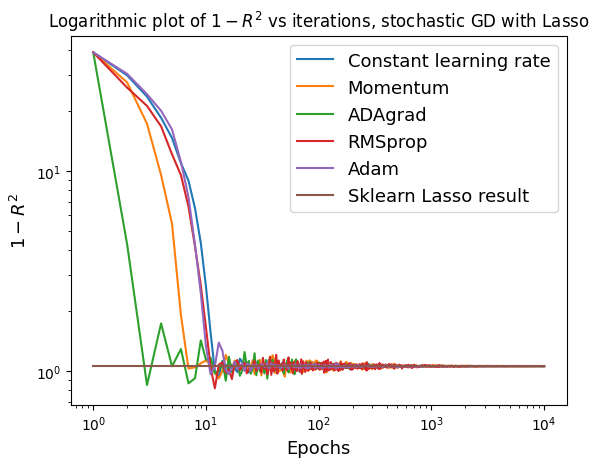

In [65]:
plt.plot(One_minus_R2_data_gd_constant_step_stochastic[0], One_minus_R2_data_gd_constant_step_stochastic[1],label='Constant learning rate')
plt.plot(One_minus_R2_data_gd_momentum_stochastic[0], One_minus_R2_data_gd_momentum_stochastic[1], label='Momentum')
plt.plot(One_minus_R2_data_gd_ADAgrad_stochastic[0], One_minus_R2_data_gd_ADAgrad_stochastic[1],label='ADAgrad')
plt.plot(One_minus_R2_data_gd_RMSprop_stochastic[0], One_minus_R2_data_gd_RMSprop_stochastic[1], label='RMSprop')
plt.plot(One_minus_R2_data_gd_Adam_stochastic[0], One_minus_R2_data_gd_Adam_stochastic[1],label='Adam')

sklearn_1_R2 = gd_constant.sklearn_lasso_1_R2(10**1)
plt.plot(One_minus_R2_data_gd_constant_step[0],np.ones(len(One_minus_R2_data_gd_constant_step[0]))*sklearn_1_R2,label="Sklearn Lasso result")

plt.title("Logarithmic plot of $1 - R^2$ vs iterations, stochastic GD with Lasso")
plt.xlabel("Epochs",fontsize = 13)
plt.ylabel("$1 - R^2$",fontsize = 13)
plt.loglog()
plt.legend(loc="upper right",fontsize = 13)

plt.show()